<a href="https://colab.research.google.com/github/GurkiratSarna/CE888-Decision-Making-UoE/blob/master/Lab_7/Exercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import layers
from keras import models

**Instantiating a small convnet**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


**Adding a classifier on top of the convnet**

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

***Training the convnet on MNIST images***

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

**Load Data**

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**compile and fit model**

In [15]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 43s 894us/step - loss: 0.2510 - acc: 0.9217 - val_loss: 0.0808 - val_acc: 0.9765
Epoch 2/5
48000/48000 [==============================] - 43s 889us/step - loss: 0.0803 - acc: 0.9772 - val_loss: 0.0856 - val_acc: 0.9781
Epoch 3/5
48000/48000 [==============================] - 43s 887us/step - loss: 0.0598 - acc: 0.9840 - val_loss: 0.0808 - val_acc: 0.9823
Epoch 4/5
48000/48000 [==============================] - 43s 899us/step - loss: 0.0567 - acc: 0.9860 - val_loss: 0.1011 - val_acc: 0.9790
Epoch 5/5
48000/48000 [==============================] - 44s 906us/step - loss: 0.0481 - acc: 0.9885 - val_loss: 0.0766 - val_acc: 0.9857


**evaluate model**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 294us/step


0.9874

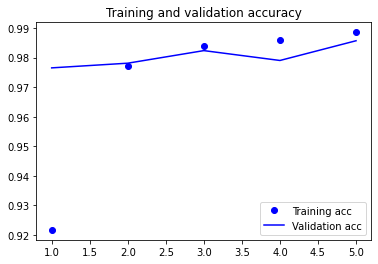

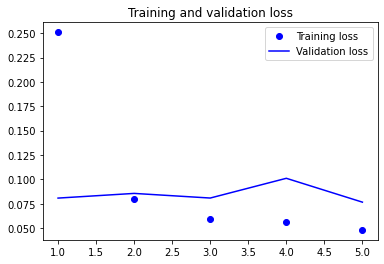

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Exercise:**

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.

In [18]:
#New model with sigmoid function
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


**Adding a classifier on top of the convnet**

In [19]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='sigmoid'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

**compile and fit model**

In [20]:
model2.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(train_images, train_labels, epochs=6, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 46s 953us/step - loss: 1.0866 - acc: 0.6362 - val_loss: 0.2173 - val_acc: 0.9436
Epoch 2/6
48000/48000 [==============================] - 44s 925us/step - loss: 0.1578 - acc: 0.9564 - val_loss: 0.1078 - val_acc: 0.9703
Epoch 3/6
48000/48000 [==============================] - 46s 957us/step - loss: 0.0951 - acc: 0.9734 - val_loss: 0.0809 - val_acc: 0.9764
Epoch 4/6
48000/48000 [==============================] - 44s 919us/step - loss: 0.0725 - acc: 0.9787 - val_loss: 0.0834 - val_acc: 0.9748
Epoch 5/6
48000/48000 [==============================] - 44s 917us/step - loss: 0.0571 - acc: 0.9835 - val_loss: 0.0682 - val_acc: 0.9792
Epoch 6/6
48000/48000 [==============================] - 43s 900us/step - loss: 0.0479 - acc: 0.9857 - val_loss: 0.0547 - val_acc: 0.9832


**evaluate model**

In [21]:
test2_loss, test2_acc = model2.evaluate(test_images, test_labels)
test2_acc

10000/10000 [==============================] - 3s 308us/step


0.9862

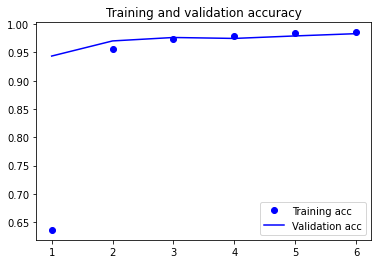

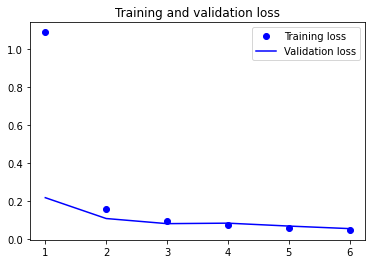

In [22]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()